In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


bank_df = pd.read_csv('./data/bank-additional/bank-additional-full.csv', sep=';')

# 1. EDA
Review the structure and content of the data and answer questions such as:
   * Are the features (columns) of your data correlated?
   * What is the overall distribution of each variable?
   * Are there any outliers present?
   * What are the relationships between different variables?
   * How are categorical variables distributed?
   * Do any patterns or trends emerge in the data?
   * What is the central tendency and spread of each variable?
   * Are there any missing values and how significant are they? 


## Assumptions
* Rather than show you all my steps linearly, I am showing you the steps I would take in production. This mean I am doing some preprocessing **before** showing you the EDA (for example, converting yes/no columns to 1/0)
* I am only using "bank additional". This is from 2014, not 2011. The documentation states this is an enriched version of bank-full. 

Only then am I showing you correlations and steps to fill null values. 

In [38]:
# Examine basic shape of the data.
print(bank_df.shape)
bank_df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0.5, 1.0, 'Proportion of subscribed (1=yes)')

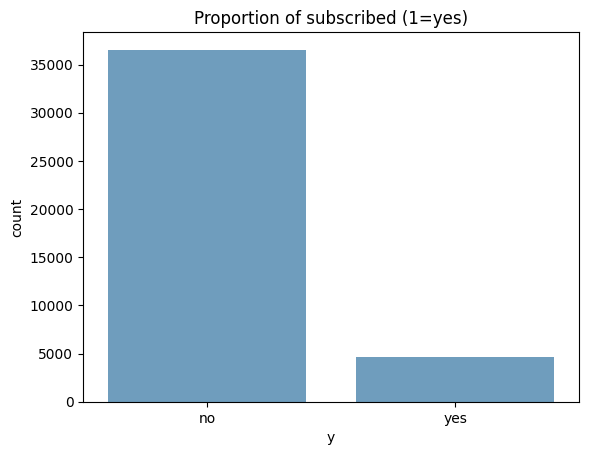

In [39]:
sns.countplot(x="y", data=bank_df, alpha=0.7)
plt.title('Proportion of subscribed (1=yes)')


In [40]:
# Transform yes/no/unknown to 1/0/None for any column that has these values
# Transform failure/success/nonexistant to 1/0/None
bank_df = bank_df.replace({'yes': 1, 'no': 0, 'unknown': None,
                            'success': 1, 'failure':0, 'nonexistent': None,
                            999:None})

# Fill with simple median here = just to show central tendency
bank_df['age'] = bank_df['age'].fillna(bank_df.age.median())

bank_df.head()



/var/folders/x5/7wnhsy191y3_zctvs3kmh14w0000gp/T/ipykernel_3053/3219422825.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df = bank_df.replace({'yes': 1, 'no': 0, 'unknown': None,
/var/folders/x5/7wnhsy191y3_zctvs3kmh14w0000gp/T/ipykernel_3053/3219422825.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df['age'] = bank_df['age'].fillna(bank_df.age.median())


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,149,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0


In [41]:
# These are our true categorical columns and can be one-hot encoded
categorical_cols = ['job', 'education', 'contact']
for c in categorical_cols:
    print(bank_df[c].value_counts())
    print()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

contact
cellular     26144
telephone    15044
Name: count, dtype: int64



In [42]:
# Check for missing values and how present they are in each column
missing_counts = bank_df.isnull().sum()
mc = missing_counts[missing_counts > 0]

missing = pd.DataFrame({'count': mc, 'pct': mc/ bank_df.shape[0]})
missing.sort_values('pct')

,count,pct
duration,2,0.000049
marital,80,0.001942
job,330,0.008012
housing,990,0.024036
loan,990,0.024036
education,1731,0.042027
default,8597,0.208726
poutcome,35563,0.863431
pdays,39673,0.963217


In [43]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,149,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,None,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0


In [44]:
numeric_cols = ['y','age', 'default', 'housing', 'loan', 
            'duration', 'campaign', 'pdays', 'previous',
            'poutcome', 'emp.var.rate', 'cons.price.idx', 
            'cons.conf.idx', 'euribor3m', 'nr.employed']

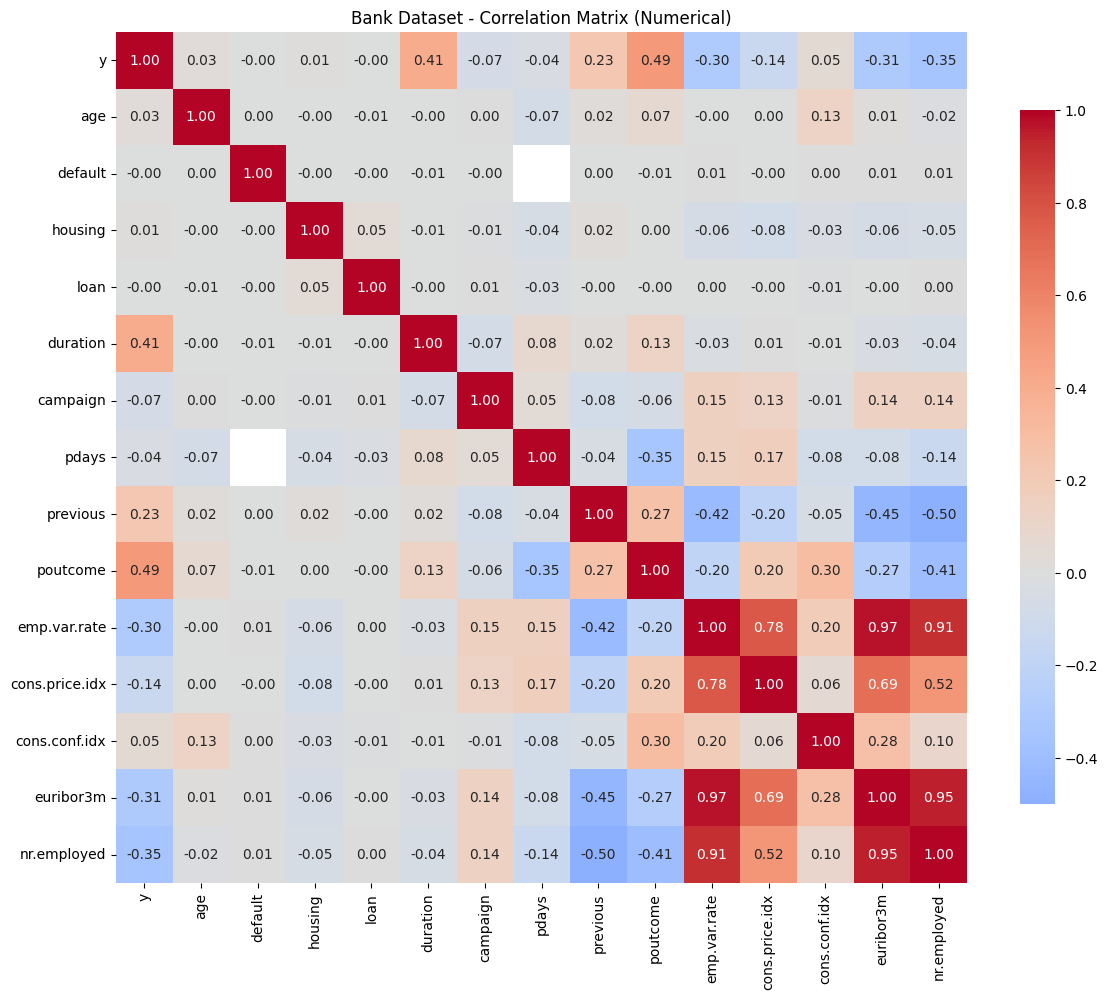

In [45]:
# Check correlations of columns
import seaborn as sns

corr_bank = bank_df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_bank, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Bank Dataset - Correlation Matrix (Numerical)')
plt.tight_layout()
plt.show()


In [46]:
bank_df.campaign.value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
40        2
42        2
39        1
56        1
37        1
41        1
Name: count, dtype: int64

/var/folders/x5/7wnhsy191y3_zctvs3kmh14w0000gp/T/ipykernel_3053/3892578692.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df_copy[col] = bank_df[col].fillna(bank_df[col].median())
/var/folders/x5/7wnhsy191y3_zctvs3kmh14w0000gp/T/ipykernel_3053/3892578692.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df_copy[col] = bank_df[col].fillna(bank_df[col].median())
/var/folders/x5/7wnhsy191y3_zctvs3kmh14w0000gp/T/ipykernel_3053/3892578692.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will

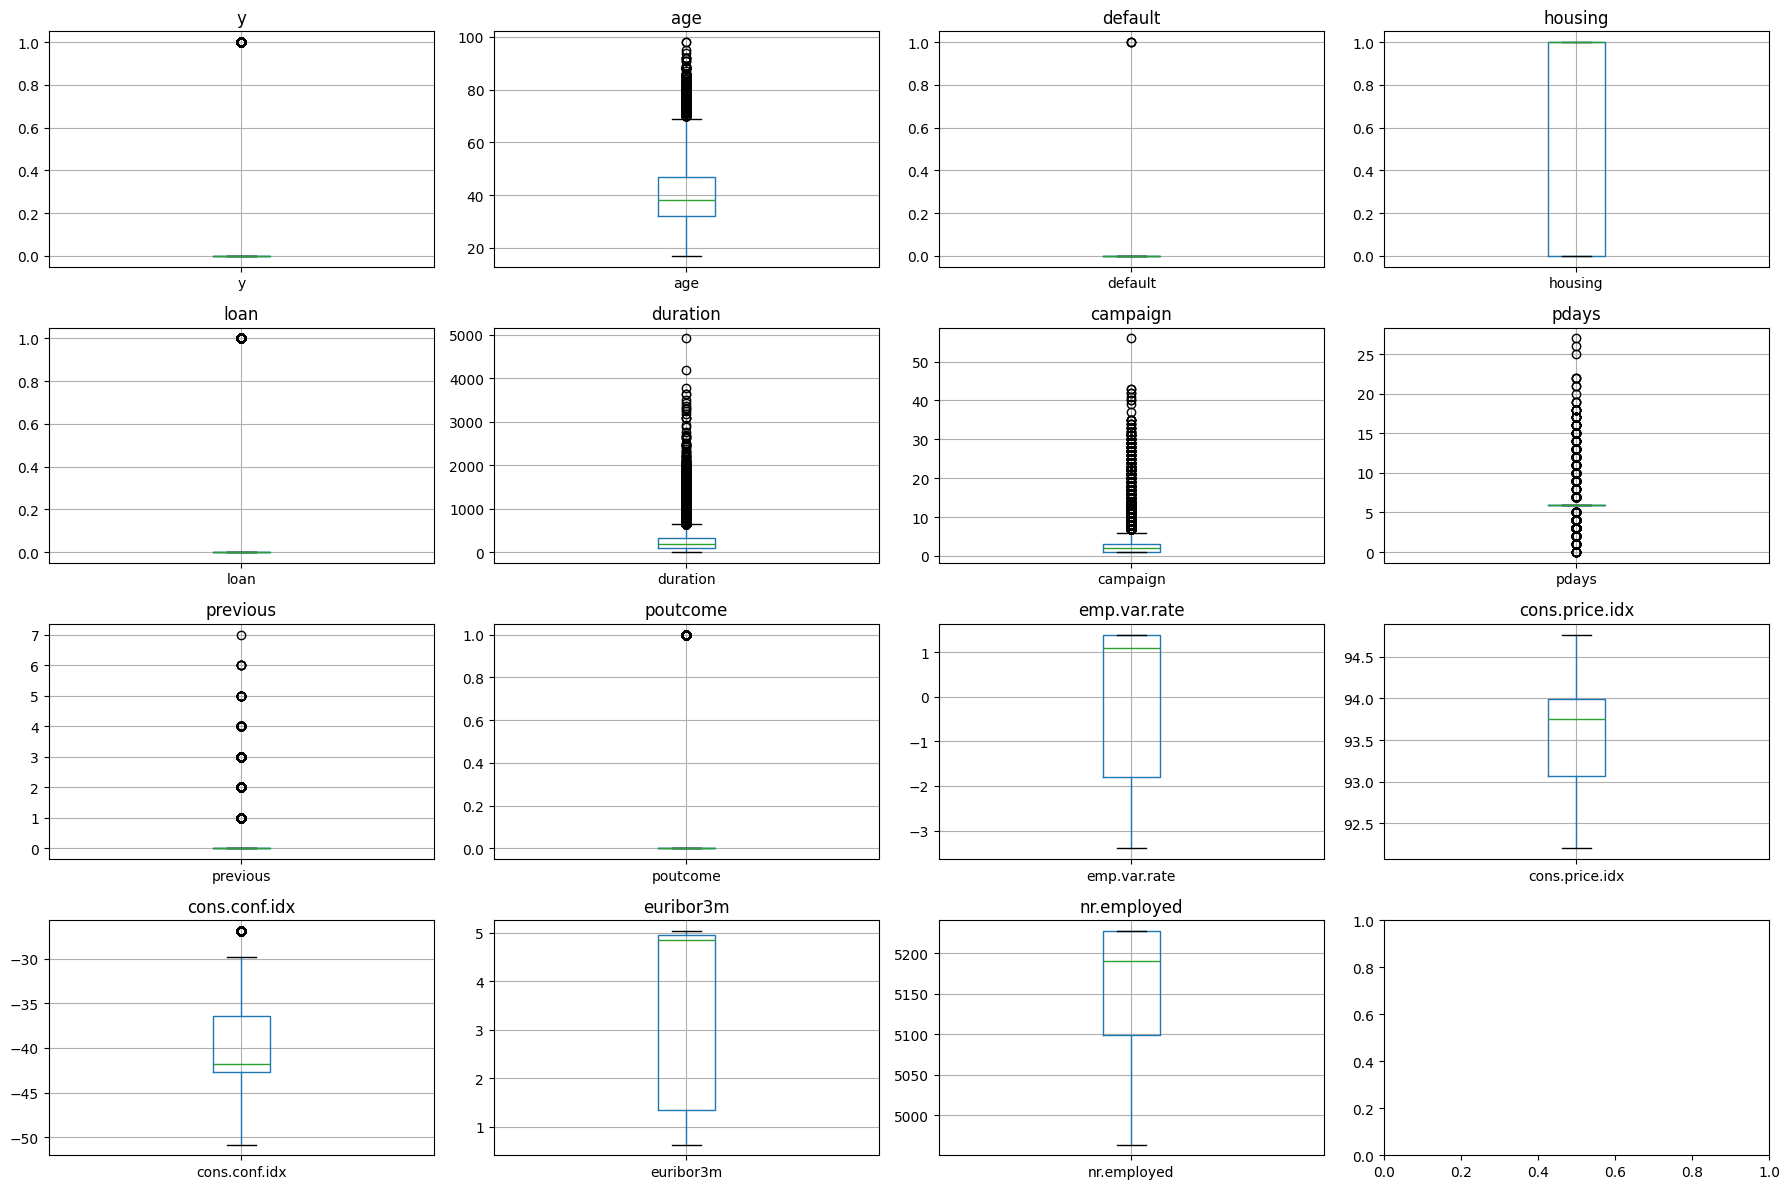

In [47]:

# Check for outliers
fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.ravel()
bank_df_copy = bank_df.copy()
for i, col in enumerate(numeric_cols):
    try:
        axes[i].set_title(col)
        bank_df.boxplot(column=col, ax=axes[i])
    except:
        bank_df_copy[col] = bank_df[col].fillna(bank_df[col].median())
        bank_df_copy.boxplot(column=col, ax=axes[i])
        continue
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'default'}>],
       [<Axes: title={'center': 'housing'}>],
       [<Axes: title={'center': 'loan'}>],
       [<Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>],
       [<Axes: title={'center': 'poutcome'}>],
       [<Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>],
       [<Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>],
       [<Axes: >],
       [<Axes: >]], dtype=object)

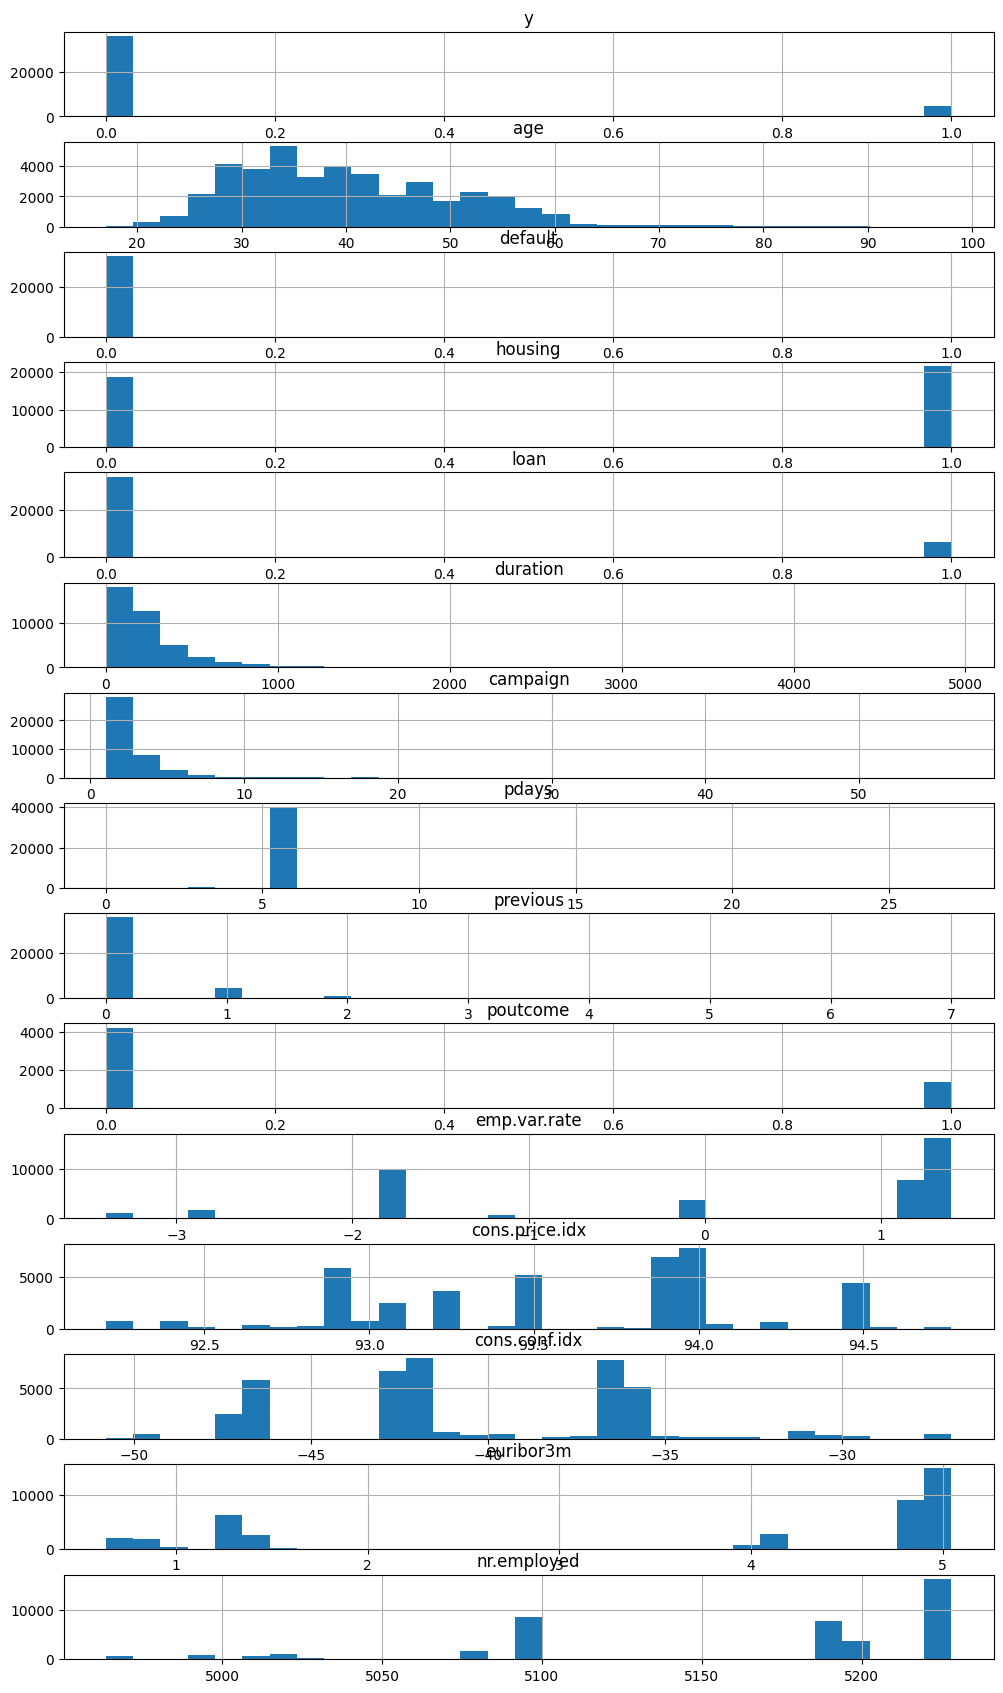

In [48]:
# Examine distributions of each variable
bank_df_copy[numeric_cols].hist(bins=31, figsize=(12, 24), layout=(17, 1))

In [49]:
bank_df[categorical_cols].head()

,job,education,contact
0,housemaid,basic.4y,telephone
1,services,high.school,telephone
2,services,high.school,telephone
3,admin.,basic.6y,telephone
4,services,high.school,telephone


In [50]:
bank_df[numeric_cols].describe().T.round(4)


,count,mean,std,min,25%,50%,75%,max
y,41188.0,0.1127,0.3162,0.000,0.000,0.000,0.000,1.000
age,41188.0,40.0241,10.4212,17.000,32.000,38.000,47.000,98.000
default,32591.0,0.0001,0.0096,0.000,0.000,0.000,0.000,1.000
housing,40198.0,0.5367,0.4987,0.000,0.000,1.000,1.000,1.000
loan,40198.0,0.1554,0.3623,0.000,0.000,0.000,0.000,1.000
poutcome,5625.0,0.2441,0.4296,0.000,0.000,0.000,0.000,1.000
emp.var.rate,41188.0,0.0819,1.5710,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.5757,0.5788,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.5026,4.6282,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.6213,1.7344,0.634,1.344,4.857,4.961,5.045


In [51]:
# Identify central tendency and spread of each variable
bank_df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,40858,11,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41108,3,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,39457,7,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,32591.0,NaN,NaN,NaN,0.000092,0.009594,0.0,0.0,0.0,0.0,1.0
housing,40198.0,NaN,NaN,NaN,0.536743,0.498654,0.0,0.0,1.0,1.0,1.0
loan,40198.0,NaN,NaN,NaN,0.155431,0.362319,0.0,0.0,0.0,0.0,1.0
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


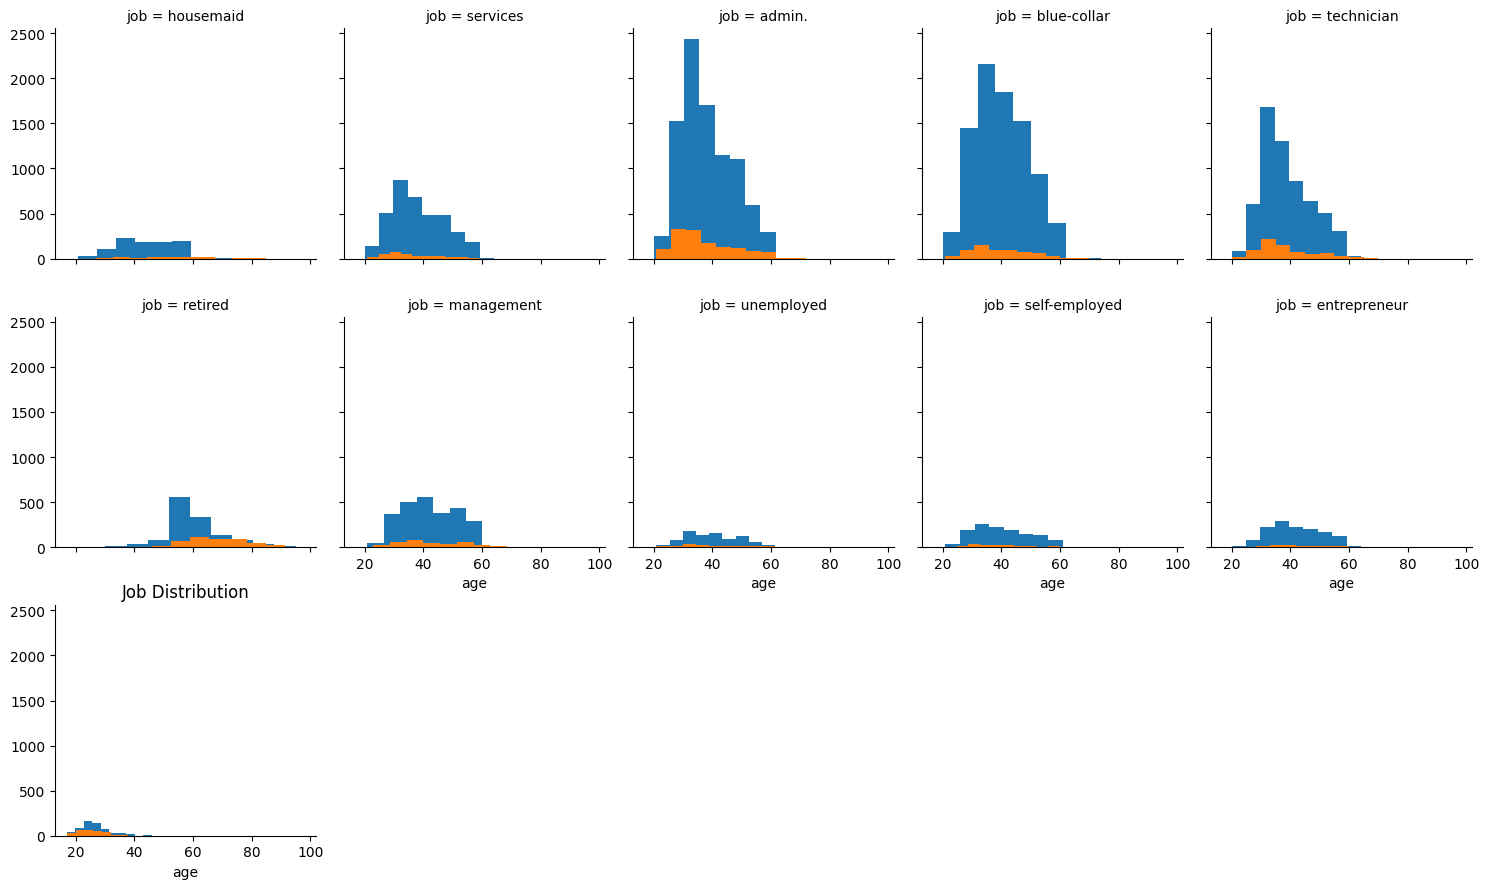

In [52]:
age_job_facet = sns.FacetGrid(bank_df, col = 'job', hue='y', col_wrap = 5)
age_job_facet.map(plt.hist, 'age')
plt.title('Job Distribution')
plt.show()

# 2. Algorithm Selection
Now you have completed the EDA, what Algorithms would suit the business purpose for the dataset. Answer questions such as:
   * Select two or more machine learning algorithms presented so far that could be used to train a model
(no need to train models - I am only looking for your recommendations).
   * What are the pros and cons of each algorithm you selected?
   * Which algorithm would you recommend, and why?
   * Are there labels in your data? Did that impact your choice of algorithm?
   * How does your choice of algorithm relates to the dataset?
   * Would your choice of algorithm change if there were fewer than 1,000 data records, and why? 

### Dataset Characteristics
* 40,000 rows (n). A large dataset. 
* 20 features (p). 16 numeric (continuous + binary) and 3 multiclass. 
* Even if we one-hot encode each multiclass feature, we will have fewer than 40 columns. Therefore n >> p , and the curse of dimensionality is not a large concern. 
  * However, if the dataset was fewer than 1000 records, we would need to take this into consideration
* There are co-linear features (e.g our economic indicators) that would not perform in linear models. 
* Our categorical features should be either one-hot encoded or given an ordinal scale (e.g. education: primary < secondary < tertiary) 
  
### Logistic Regression
My first model selection choice would be a logistic regression model. 

**Pros:** LR excels in interpretability: it has clear beta coefficients that indicate feature importance and direction of influence. Since it trains via gradient descent, it performs well on datasets of this size (large, but not so large that partial fits are required). As long as we regularize our features, it will be relatively robust to overfitting. 

**Cons:** Assumes linear relationships between features and log-odds, which means it can miss complex interactions. It is sensitive to outliers and requires feature scaling for optimal performance. It assumes no multicolinearity, so we need to reengineer or combine those variables. 

### Naive Bayes

**Pros:** Naive Bayes performs exceptionally well with categorical features and handles mixed data types naturally. It's computationally efficient, requires minimal training data, and is robust to irrelevant features. The algorithm works well with the assumption of feature independence and provides fast predictions, making it suitable for real-time applications.

**Cons:** The strong independence assumption is often violated in practice, particularly problematic when customer characteristics are correlated. Performance can degrade significantly when this assumption is severely violated. Less interpretable than logistic regression for understanding feature importance, which is a strong drawback if we need to explain this to banking regulators. 

### Considering N < 1000
With fewer than 1,000 records, Naive Bayes becomes more attractive. It has minimal data requirements and robustness to small sample sizes, which  make it superior to logistic regression. LR  may suffer from unstable coefficient estimates and can overfit in small datasets. The independence assumption becomes less problematic when data is limited and model complexity must be minimized.


In [53]:
categorical_cols

['job', 'education', 'contact']

In [54]:
print(len(numeric_cols))
numeric_cols

15


['y',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

# 3. Pre-processing
Now you have done an EDA and selected an Algorithm, what pre-processing (if any) would you require for:
   * Data Cleaning - improve data quality, address missing data, etc.
   * Dimensionality Reduction - remove correlated/redundant data than will slow down training
   * Feature Engineering - use of business knowledge to create new features
   * Sampling Data - using sampling to resize datasets
   * Data Transformation - regularization, normalization, handling categorical variables
   * Imbalanced Data - reducing the imbalance between classes

## Data Pre-Processing Steps

* Convert time features to cosine (represent cylcical nature of time)
* Turn `education` in to an ordinal feature
* Turn `job` into an ordinal feature
* Turn `campaign` into three buckets: 1, 2, 3+
* Fill nulls in `default`, `housing`, `loan` with `0`. There is a busienss case for this. "1" will represent a known positive: "This person has defaulted on a loan." We can treat a "no" and "unknown" the same.
* Drop `duration` which creates lookahead bias
* Drop `pdays` bc it has more than 90% null values - too null to be useful
* Drop `poutcome`. This is useful for a follow-on model (e.g returning customers. But not for cold-start problem)
* Drop colinear economic outcomes (only keep `nr.employed`,`cons.price.idx`)
* Scale all numeric features to 0-1
* Re-sample training data to show imbalanced y target variable


In [55]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_map = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}
# Transform 3-letter  codes to numerical values
bank_df['month_n'] = bank_df['month'].map(month_map)
bank_df['day_n'] = bank_df['day_of_week'].map(day_map)

# Take cosine transformation of day, since these are circular metrics
bank_df['month_cos'] = np.cos(2 * np.pi * bank_df['month_n'] / 12)
bank_df['day_cos'] = np.cos(2 * np.pi * bank_df['day_n'] / 7)




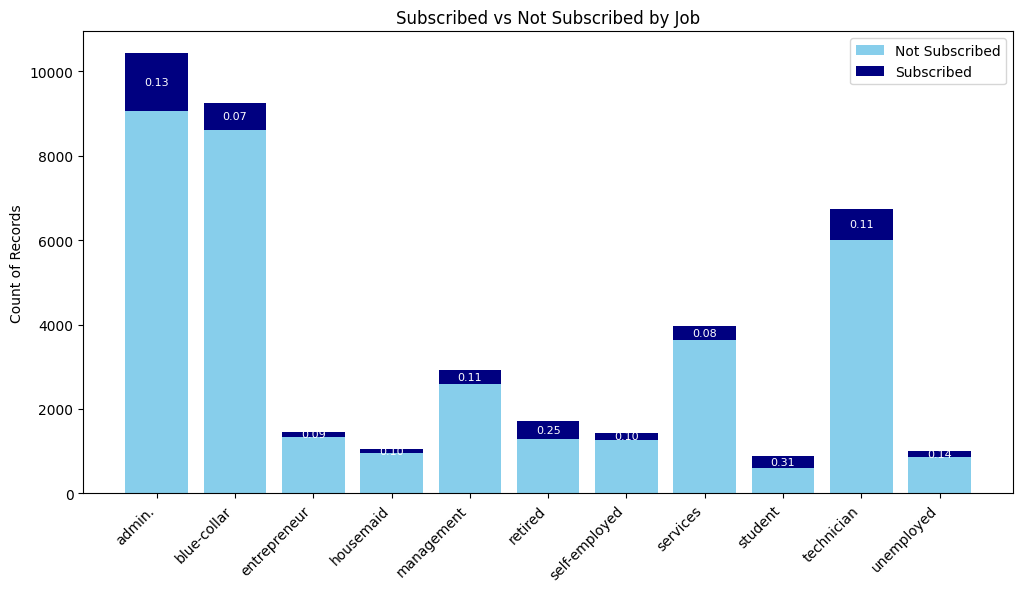

In [56]:


agg = (bank_df
       .groupby('job')['y']
       .agg(NotSubscribed = lambda s: (s==0).sum(),
            Subscribed = lambda s: (s==1).sum())
       .assign(Total = lambda df: df['Subscribed'] + df['NotSubscribed'],
               SubscribedProportion = lambda df: df['Subscribed'] / df['Total'])
       .reset_index())


jobs = agg['job']
not_sub = agg['NotSubscribed']
sub = agg['Subscribed']
prop = agg['SubscribedProportion']

x = np.arange(len(jobs))
width = 0.8

fig, ax = plt.subplots(figsize=(12, 6))

# Bottom = NotSubscribed
ax.bar(x, not_sub, width, label='Not Subscribed', color='skyblue')
# Stack Subscribed on top
ax.bar(x, sub, width, bottom=not_sub, label='Subscribed', color='navy')

# Annotate with SubscribedProportion (converted to % or decimal)
for i, (ns, s, p) in enumerate(zip(not_sub, sub, prop)):
    # position of top of the bar
    y_pos = ns + s / 2  
    ax.text(x[i], y_pos, f'{p:.2f}', ha='center', va='center', color='white', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(jobs, rotation=45, ha='right')
ax.set_ylabel('Count of Records')
ax.set_title('Subscribed vs Not Subscribed by Job')
ax.legend()

# plt.tight_layout()
plt.show()


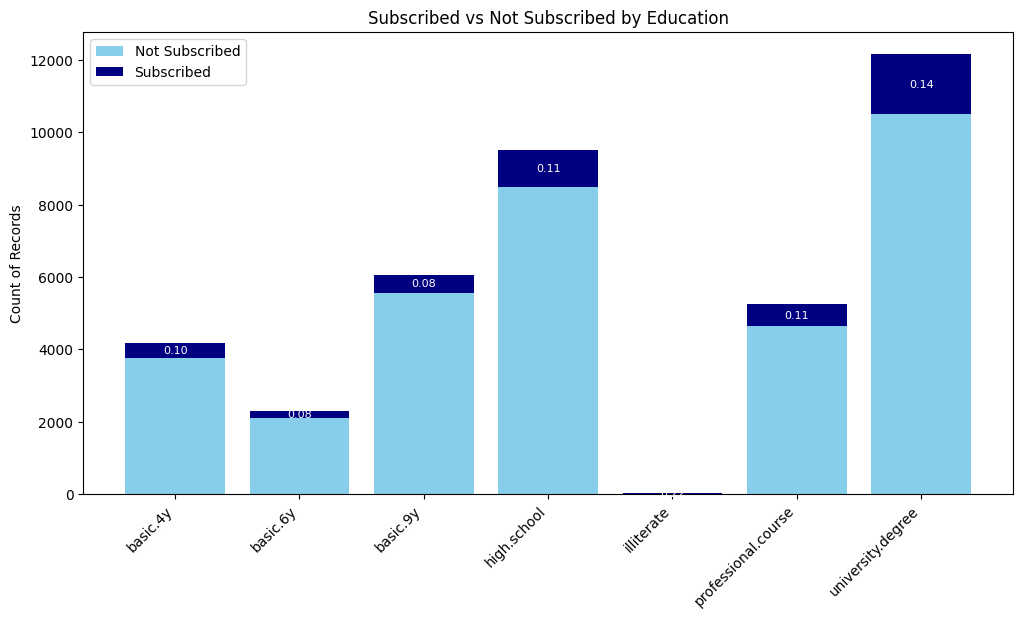

In [57]:


agg = (bank_df
       .groupby('education')['y']
       .agg(NotSubscribed = lambda s: (s==0).sum(),
            Subscribed = lambda s: (s==1).sum())
       .assign(Total = lambda df: df['Subscribed'] + df['NotSubscribed'],
               SubscribedProportion = lambda df: df['Subscribed'] / df['Total'])
       .reset_index())


education = agg['education']
not_sub = agg['NotSubscribed']
sub = agg['Subscribed']
prop = agg['SubscribedProportion']

x = np.arange(len(education))
width = 0.8

fig, ax = plt.subplots(figsize=(12, 6))

# Bottom = NotSubscribed
ax.bar(x, not_sub, width, label='Not Subscribed', color='skyblue')
# Stack Subscribed on top
ax.bar(x, sub, width, bottom=not_sub, label='Subscribed', color='navy')

# Annotate with SubscribedProportion (converted to % or decimal)
for i, (ns, s, p) in enumerate(zip(not_sub, sub, prop)):
    # position of top of the bar
    y_pos = ns + s / 2  
    ax.text(x[i], y_pos, f'{p:.2f}', ha='center', va='center', color='white', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(education, rotation=45, ha='right')
ax.set_ylabel('Count of Records')
ax.set_title('Subscribed vs Not Subscribed by Education')
ax.legend()

# plt.tight_layout()
plt.show()


In [65]:
# Map profession to ordinal values, based on proportions above
job_map = {
        'blue-collar': 0.5,
        'services': 0.5,
        'entrepreneur': 0.5,
        'unkonwn': 0.5,

        'housemaid': 1,
        'self-employed':1,
        'technician':1,
        'management':1,
        'admin.': 1,
        'unemployed':1,

        'retired':2,
        'student':2
    }

# Map education to ordinal values: 0.5, 1, 2
education_map = {
        "illiterate":0.5,
        "unknown":0.5,

        "basic.4y":1,
        "basic.6y":1,
        "basic.9y":1,
        "high.school":1,
        "professional.course":1,

        "university.degree":2,
    }

contact_map = {
    'telephone': 1,
    'cellular':0
}

bank_df['education_n'] = bank_df.education.fillna('unknown').map(education_map) 
bank_df['job_n'] = bank_df.job.fillna('unknown').map(job_map) 
bank_df['contact_n'] = bank_df.contact.fillna('unknown').map(contact_map) 

In [72]:
# Transform to 1,2 3
def transform_campaign(x):
    if x >=3:
        return 3
    else:
        return x
    
bank_df['campaign_n'] = bank_df.campaign.apply(transform_campaign)

In [66]:
bank_df['default'] = bank_df['default'].fillna(0)
bank_df['housing'] = bank_df['housing'].fillna(0)
bank_df['loan'] = bank_df['loan'].fillna(0)



In [73]:
x_columns = ['age', 'education_n','job_n','contact_n', 
            'default', 'housing', 'loan', 'campaign_n', 'previous', 
            'cons.price.idx', 'nr.employed',
            'month_cos', 'day_cos']

bank_df[['y'] + x_columns]

,y,age,education_n,job_n,contact_n,default,housing,loan,campaign_n,previous,cons.price.idx,nr.employed,month_cos,day_cos
0,0,56,1.0,1.0,1,0.0,0.0,0.0,1,0,93.994,5191.0,-0.866025,0.623490
1,0,57,1.0,0.5,1,0.0,0.0,0.0,1,0,93.994,5191.0,-0.866025,0.623490
2,0,37,1.0,0.5,1,0.0,1.0,0.0,1,0,93.994,5191.0,-0.866025,0.623490
3,0,40,1.0,1.0,1,0.0,0.0,0.0,1,0,93.994,5191.0,-0.866025,0.623490
4,0,56,1.0,0.5,1,0.0,0.0,1.0,1,0,93.994,5191.0,-0.866025,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,73,1.0,2.0,0,0.0,1.0,0.0,1,0,94.767,4963.6,0.866025,-0.222521
41184,0,46,1.0,0.5,0,0.0,0.0,0.0,1,0,94.767,4963.6,0.866025,-0.222521
41185,0,56,2.0,2.0,0,0.0,1.0,0.0,2,0,94.767,4963.6,0.866025,-0.222521
41186,1,44,1.0,1.0,0,0.0,0.0,0.0,1,0,94.767,4963.6,0.866025,-0.222521


In [74]:
# Resample unbalanced y-class
from sklearn.utils import resample

all_positive_cases = bank_df[bank_df.y == 1]
all_negative_cases =  bank_df[bank_df.y != 1]

df_majority_undersampled = resample(all_negative_cases, 
                                    replace=False,    # sample without replacement
                                    n_samples=len(all_positive_cases),
                                    random_state=42) 

bank_df_resampled = pd.concat([df_majority_undersampled, all_positive_cases])
print(bank_df_resampled.shape)
bank_df_resampled.y.value_counts()


(9280, 29)


y
0    4640
1    4640
Name: count, dtype: int64

In [75]:
# Standard scale features
from sklearn.preprocessing import StandardScaler
X_train = bank_df_resampled[x_columns]
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_train_scaled


array([[-1.36570091, -0.61232046, -1.0733883 , ...,  0.63908352,
        -0.61602661,  1.70499449],
       [-0.28153028,  1.40269156,  0.12612769, ...,  0.63908352,
        -0.61602661, -0.9901664 ],
       [ 0.3022539 , -0.61232046,  0.12612769, ..., -0.41961636,
        -0.61602661,  1.70499449],
       ...,
       [-0.28153028,  1.40269156,  0.12612769, ..., -1.98059388,
         2.33615653,  0.20929303],
       [ 2.72078838, -0.61232046,  2.52515965, ..., -1.98059388,
         2.33615653,  0.20929303],
       [ 0.3022539 , -0.61232046,  0.12612769, ..., -1.98059388,
         2.33615653,  0.20929303]], shape=(9280, 13))